In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# all_airports is a function that that prints delayed flights, on time flights, and flights without data 
# from all airports in the data set
# it has one input, fhand, the opended file of airport data
def all_airports(fhand):
    late_flights=0
    ontime_flights=0
    nodata_flights=0

    for line in fhand:  # This for loop counts number of flights for each catagory
        delimiter = ',' 
        t = line.split(delimiter) 
        try:
            if float (t[23]) > 0.00 :
                late_flights= late_flights + 1
            elif float (t[23]) == 0.00 or len(t[23]) == 0 :
                ontime_flights= (ontime_flights + 1)
        except:
            nodata_flights = (nodata_flights + 1)
    print("For all airports there were",late_flights, "late flights,", ontime_flights, "on time flights, and", nodata_flights, "flights there is no data for.")
    return late_flights, ontime_flights, nodata_flights  # returns number of flights

In [3]:
# ur_airport is a function that returns delayed flights, on time flights, and flights without data
# for a specific airport, it asks the user to enter an airport code for the airport they want to look at
# it has one input, df, the opended file of airport data with pd
def ur_airport(df):
    airport_code=str(input("What airport do you want to look at?"))  # ask user for code
    late_flights1 = 0
    ontime_flights1=0
    nodata_flights1=0
    code = df['ORIGIN']
    Weather_Delay = df['WEATHER_DELAY']
    Delay = []

    for i in range(1000):  # This for loop counts number of flights for each catagory
        if code[i] == airport_code:
            Delay.append(Weather_Delay[i])

    for i in Delay:
#         delimiter = ','
#         t = line.split(delimiter)
        try :
            if float (i) > 0.00 :
    #             print('Late')
                late_flights1= late_flights1 + 1
            elif float (i) == 0.00 or len(i) == 0 :
    #             print('On Time')
                ontime_flights1= (ontime_flights1 + 1)
        except :
    #         print('No Data')
            nodata_flights1 = (nodata_flights1 + 1)

    print("For your airport there were", late_flights1, "late flights,", ontime_flights1, "on time flights, and", nodata_flights1, "flights there is no data for.")
    return late_flights1, ontime_flights1, nodata_flights1  # returns number of flights

For all airports there were 54286 late flights, 1030043 on time flights, and 5071716 flights there is no data for.


What airport do you want to look at? LAX


For your airport there were 0 late flights, 25 on time flights, and 58 flights there is no data for.


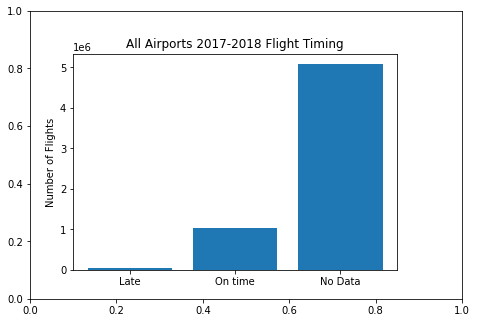

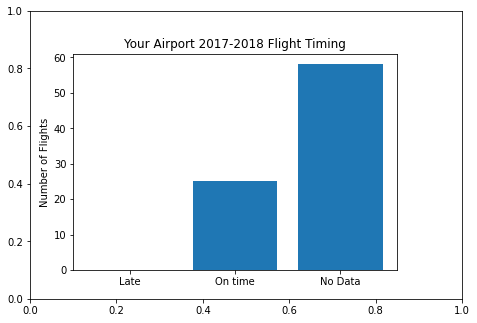

In [11]:
# The main function calls both the all_airports and the ur_airport funtions
# it then uses the values returned from those functions to plot the number of late, ontime, and no data flights
def main():
    df=pd.read_csv(r'/ufrc/bsc4452/share/Class_Files/data/flights.May2017-Apr2018.csv')
    fhand = open('/ufrc/bsc4452/share/Class_Files/data/flights.May2017-Apr2018.csv', "r")
    late_flights, ontime_flights, nodata_flights = all_airports(fhand)  # calls first funtion
    late_flights1, ontime_flights1, nodata_flights1 = ur_airport(df)  # calls second funtion
    
    # Graph shows delayed, on time, and flights without data from all airports in the data set
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
    data = ['Late', 'On time', 'No Data']
    flight_times = [late_flights, ontime_flights, nodata_flights]
    ax.bar(data,flight_times)
    ax.set_ylabel('Number of Flights')
    plt.title('All Airports 2017-2018 Flight Timing')
    fig.savefig('all_airports_graph.pdf')
    
    #Graph shows delayed, on time, and flights without data from the specific input airport
    fig1 = plt.figure()
    axin = fig1.add_axes([0,0,1,1])
    axin = fig1.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
    data = ['Late', 'On time', 'No Data']
    flight_times1 = [late_flights1, ontime_flights1,nodata_flights1]
    axin.bar(data,flight_times1)
    axin.set_ylabel('Number of Flights')
    plt.title('Your Airport 2017-2018 Flight Timing')
    fig1.savefig('your_airport_graph.pdf')
    plt.show()
main()